In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls /content/gdrive/MyDrive/Data/HousingPrices/

housing.csv


In [3]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/Data/HousingPrices/housing.csv")
df.fillna(0, inplace=True)
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

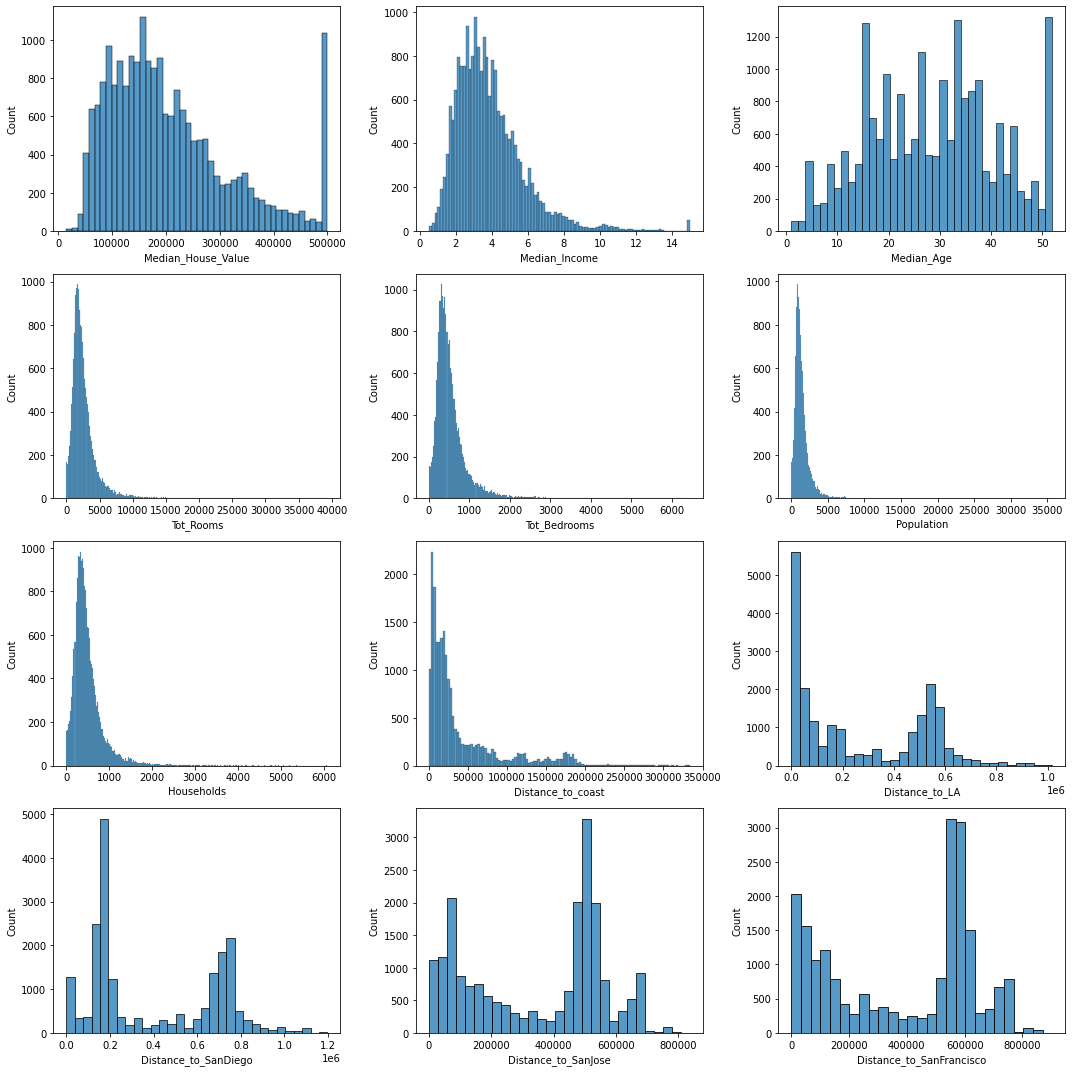

In [11]:
fig, ax = plt.subplots(4, 3, figsize=[15,15])

sns.histplot(data=df, x="Median_House_Value", ax=ax[0, 0])
sns.histplot(data=df, x="Median_Income", ax=ax[0, 1])
sns.histplot(data=df, x="Median_Age", ax=ax[0, 2])
sns.histplot(data=df, x="Tot_Rooms", ax=ax[1, 0])
sns.histplot(data=df, x="Tot_Bedrooms", ax=ax[1, 1])
sns.histplot(data=df, x="Population", ax=ax[1, 2])
sns.histplot(data=df, x="Households", ax=ax[2, 0])
sns.histplot(data=df, x="Distance_to_coast", ax=ax[2, 1])
sns.histplot(data=df, x="Distance_to_LA", ax=ax[2, 2])
sns.histplot(data=df, x="Distance_to_SanDiego", ax=ax[3, 0])
sns.histplot(data=df, x="Distance_to_SanJose", ax=ax[3, 1])
sns.histplot(data=df, x="Distance_to_SanFrancisco", ax=ax[3, 2])

fig.tight_layout()
plt.show()

## Using linear regression predict a houses distance to the coast based on other housing factors. 

In [25]:
y = df["Distance_to_coast"]

data_keys = df.keys()[:-5]
x_unscaled = df[data_keys]

In [15]:
from sklearn.decomposition import PCA

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(x_unscaled)
data_rescaled

array([[0.90226638, 0.53966842, 0.78431373, ..., 0.02055583, 0.5674814 ,
        0.21115538],
       [0.70824656, 0.53802706, 0.39215686, ..., 0.18697583, 0.565356  ,
        0.21215139],
       [0.69505074, 0.46602805, 1.        , ..., 0.02894261, 0.5642933 ,
        0.21015936],
       ...,
       [0.15938285, 0.08276438, 0.31372549, ..., 0.07104095, 0.73219979,
        0.31175299],
       [0.14371281, 0.09429525, 0.33333333, ..., 0.05722743, 0.73219979,
        0.30179283],
       [0.15340349, 0.13025338, 0.29411765, ..., 0.08699227, 0.72582359,
        0.30976096]])

## Linear Regression model without principla comoponent analyisis. 

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_rescaled, y, test_size=.15, random_state=9)

In [96]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train, y_train)

In [97]:
y_pred = lr.predict(X_test)

In [98]:
lr.score(X_test, y_test).round(4)

0.671

## Testing the Linear Regression with PCA

In [84]:
pca = PCA(n_components=6) 
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [99]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(reduced, y, test_size=0.15, random_state=9)

In [100]:
pca_lr = LinearRegression()

pca_model = pca_lr.fit(pca_X_train, pca_y_train)

In [101]:
pca_pred = pca_lr.predict(pca_X_test)

In [102]:
pca_lr.score(pca_X_test, pca_y_test).round(4)

0.6706

As you can see dropping our components from 9 to 6 using PCA gives us very similar results as the standard linear regression. 

## Testing the Linear Regression with SVD

In [89]:
from sklearn.decomposition import TruncatedSVD

In [90]:
svd = TruncatedSVD(n_components=6)
svd.fit(data_rescaled)
svd_reduced = svd.transform(data_rescaled)

In [103]:
svd_X_train, svd_X_test, svd_y_train, svd_y_test = train_test_split(svd_reduced, y, test_size=0.15, random_state=9)

In [104]:
svd_lr = LinearRegression()

svd_model = svd_lr.fit(svd_X_train, svd_y_train)

In [105]:
svd_pred = svd_lr.predict(svd_X_test)

In [106]:
svd_lr.score(svd_X_test, svd_y_test).round(4)

0.6695